# Loan Approval Status Prediction

# Problem Statement:

Have you ever thought the apps which can predict whether you will get your loan approved or not work? Develope one such model which can predict whether a person will get his/her loan approved or not by using some of the background information of the applicant like the applicant’s gender, marital status, income, etc.

# Independent Variables:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

# Dependent Variable (Target Variable):

Loan_Status


You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
df = pd.read_csv('loan.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#Let's check the shape of dataset
df.shape

(614, 13)

There are 614 rows and 13 columns including our target variable present in our dataset

In [5]:
#Let's see first 5 values of data.
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Let's see last 5 values of data.
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
#Let's check the info & datatype of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 8 object, 4 flot and 1 integer attributes in our dataset

In [8]:
# checking statistical summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We can clearly see Applicantincome, Coapplicantincome, LoanAmount are Right skewed because Mean values is greater than the Median Values.

Loan Amount & Loan_amount term are left skewed because Median is greater than Mean values.

There is a compartively high difference between 3rd quantile (75%) and max values which also proves that outiliers are present in dataset

In [9]:
#Checking Null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So, We can clearly see that there are few attributes where Null values are present

In [10]:
# Dropping unnecessary columns. Loan Id has no significance to predict our Loan Status.
df.drop(['Loan_ID'],axis=1,inplace=True)

<AxesSubplot:title={'center':'NUll values'}>

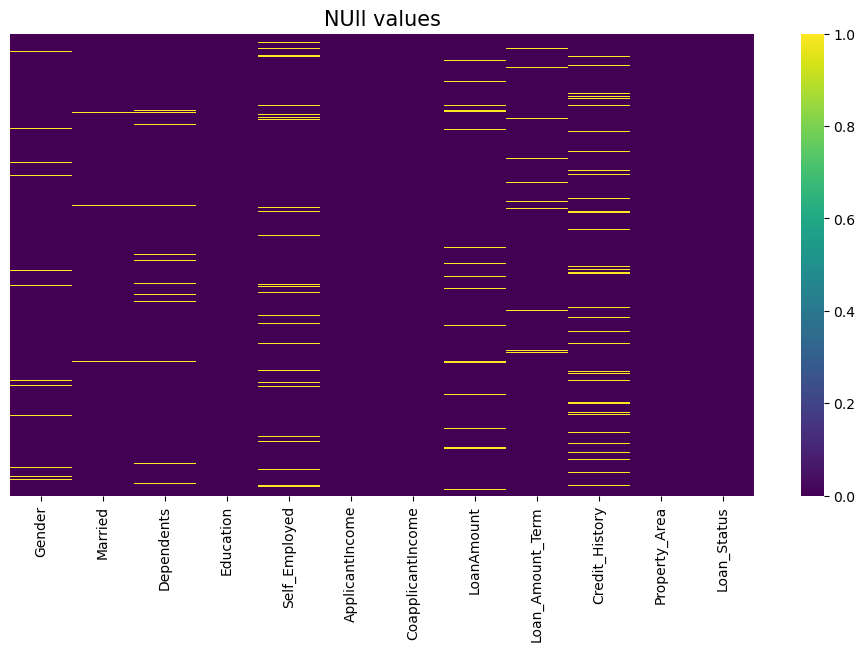

In [11]:
#Let's see null values by heatmap
plt.figure(figsize=(12,6))
plt.title('NUll values',fontsize=15)
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

This dataset has few Null Values which we will deal later.

In [12]:
# filling the missing values for numerical terms by - median
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [13]:
# Filling the missing values for categorical terms by - mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [14]:
#Let's check Null values now
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

So, Now there is no Null values in our dataset

<AxesSubplot:title={'center':'NUll values'}>

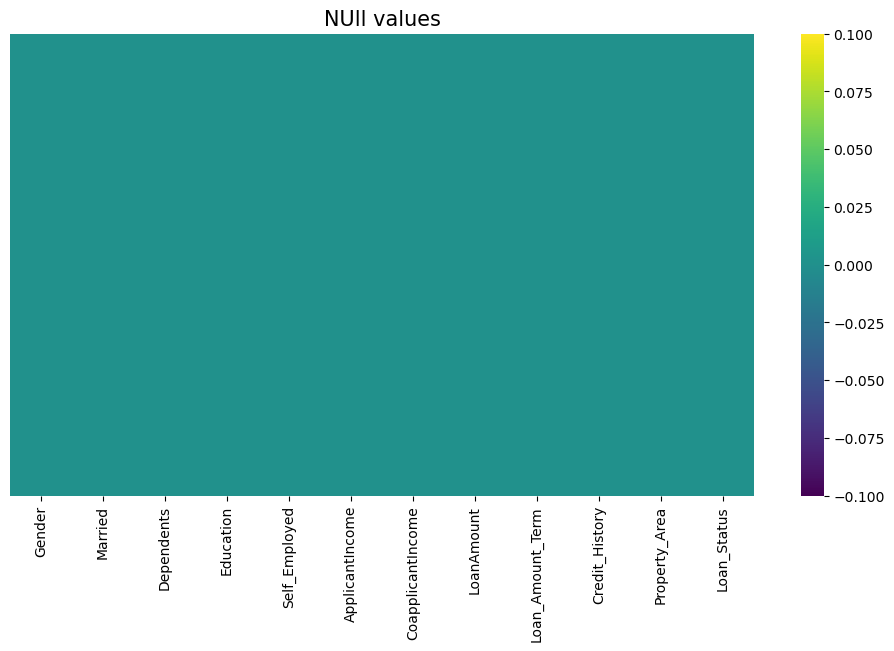

In [15]:
#Let's see null values by heatmap
plt.figure(figsize=(12,6))
plt.title('NUll values',fontsize=15)
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

There is no Null values now in dataset

# Segregation of Object and Numeric DataType for Analysis

In [16]:
## for Numeric Attributes
num_df=df.select_dtypes(exclude='object')

## for categorical Attributes
obj_df=df.select_dtypes(include='object')

<AxesSubplot:title={'center':'Correlation Heatmap'}>

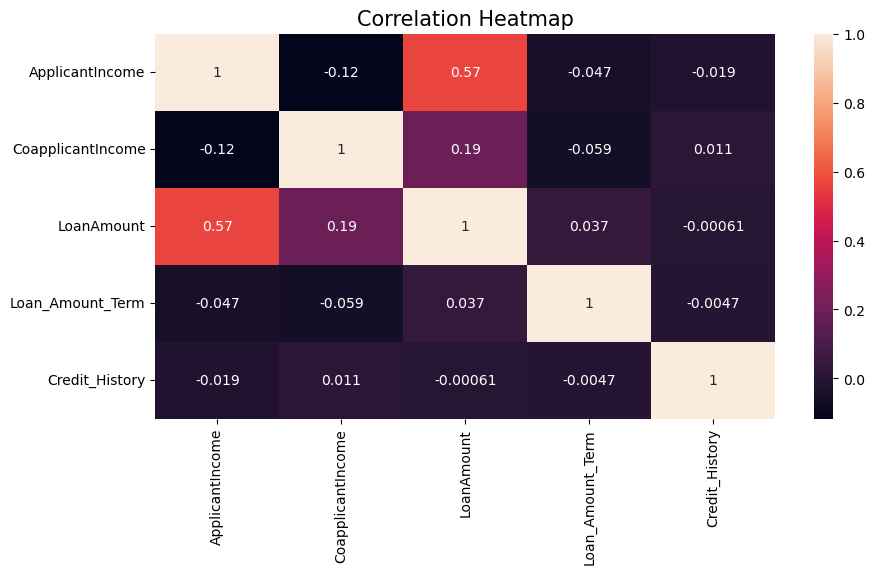

In [17]:
## correlation Plot
plt.figure(figsize=(10,5))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True)

Our Loan amount is highly correlated with Applicant Income which is .57.

Neither the strong positive nor the strong negative correlation present in any variable.

# Data Visualization

<AxesSubplot:title={'center':'Male Vs Female'}, xlabel='Gender', ylabel='count'>

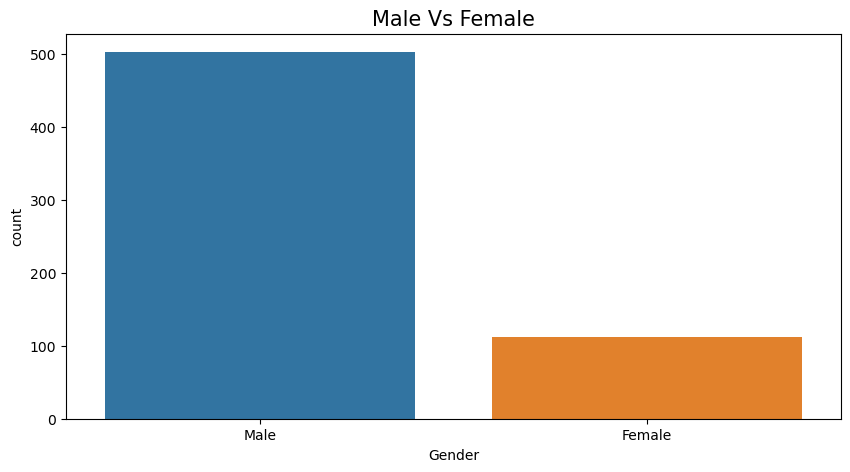

In [18]:
plt.figure(figsize=(10,5))
plt.title('Male Vs Female',fontsize=15)
sns.countplot(df['Gender'],data=df)

Almost 500 Male and 100 Female applied for the loan.

<AxesSubplot:title={'center':'Married Vs unmarried'}, xlabel='Married', ylabel='count'>

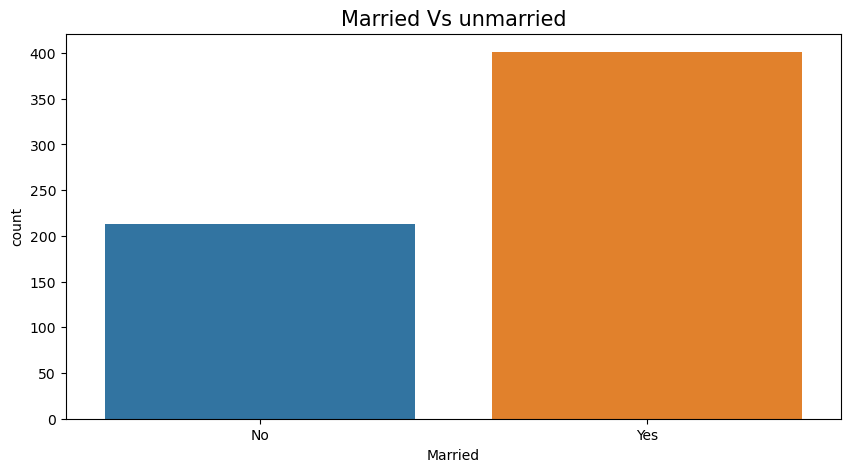

In [19]:
plt.figure(figsize=(10,5))
plt.title('Married Vs unmarried',fontsize=15)
sns.countplot(df['Married'])

Almost 400 married & more than 200 unmarried people applied for loan

<AxesSubplot:title={'center':'Dependents'}, xlabel='Dependents', ylabel='count'>

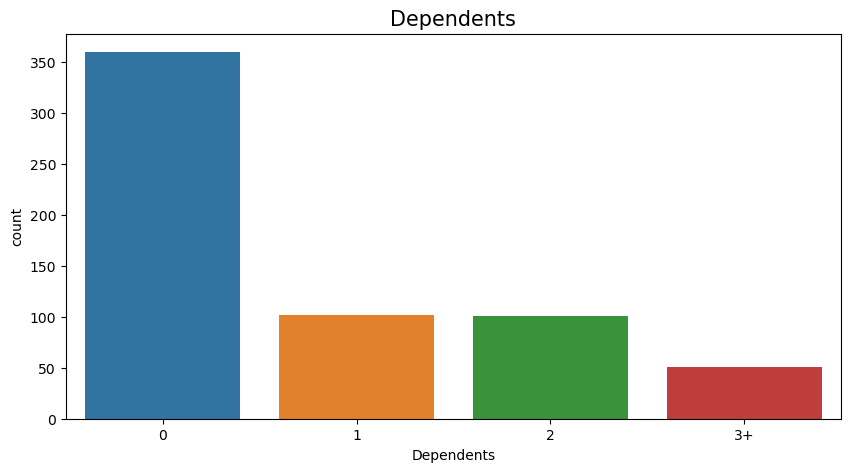

In [20]:
plt.figure(figsize=(10,5))
plt.title('Dependents',fontsize=15)
sns.countplot(df['Dependents'])

More than 350 people doesn't have any dependents and around 100 people have either 1 or 2 dependents in family. Less than 50 people are there who has more than 3 dependents in family.

<AxesSubplot:title={'center':'Self Employed'}, xlabel='Self_Employed', ylabel='count'>

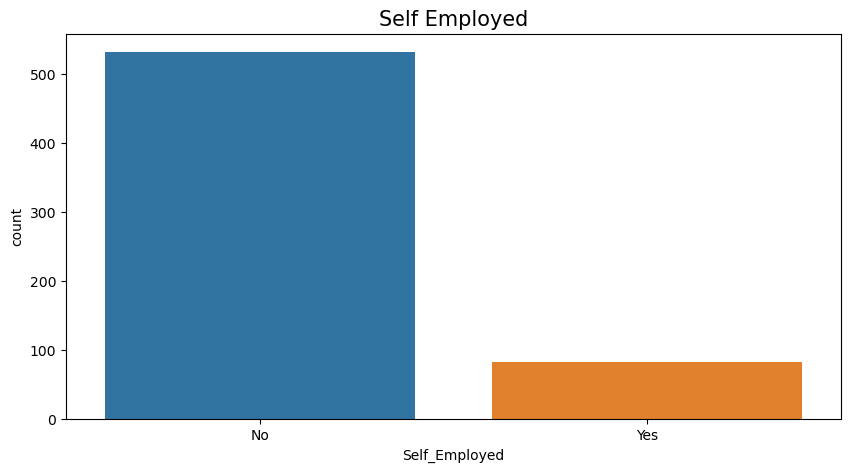

In [21]:
plt.figure(figsize=(10,5))
plt.title('Self Employed',fontsize=15)
sns.countplot(df['Self_Employed'])

more than 500 people applied for loan aren't self employed and more than 50 people are self employed.

<AxesSubplot:title={'center':'Loan Status'}, xlabel='Loan_Status', ylabel='count'>

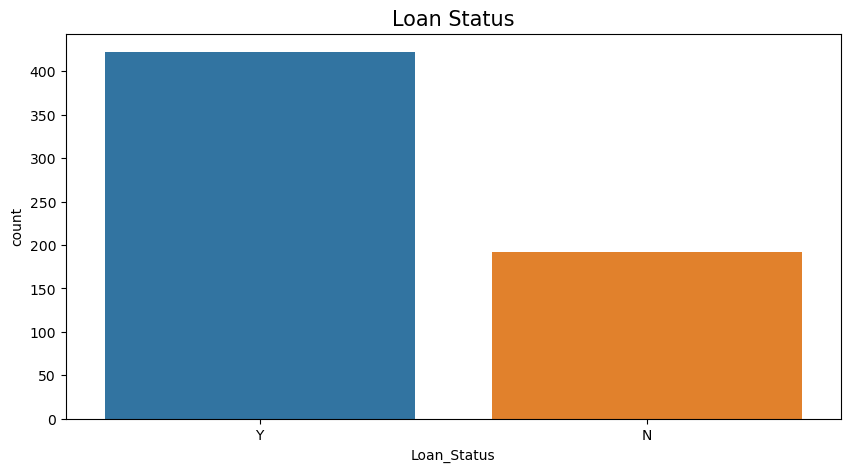

In [22]:
plt.figure(figsize=(10,5))
plt.title('Loan Status',fontsize=15)
sns.countplot(df['Loan_Status'])

more than 400 peoples loan aproved and more than 150 peoples loan not aproved.

<AxesSubplot:title={'center':'property area'}, xlabel='Property_Area', ylabel='count'>

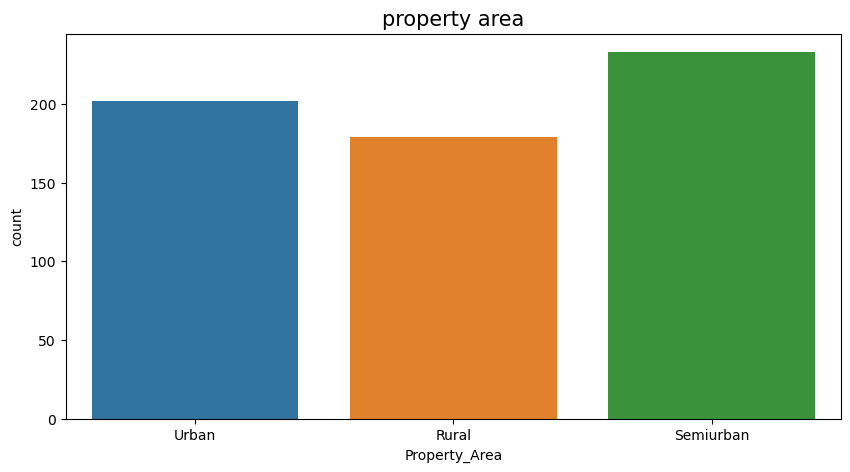

In [23]:
plt.figure(figsize=(10,5))
plt.title('property area',fontsize=15)
sns.countplot(df['Property_Area'])

More than 200 people belongs to Semiurban area, arond 200 people belongs to urban area and around 170-180 people belongs to Rural area.

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

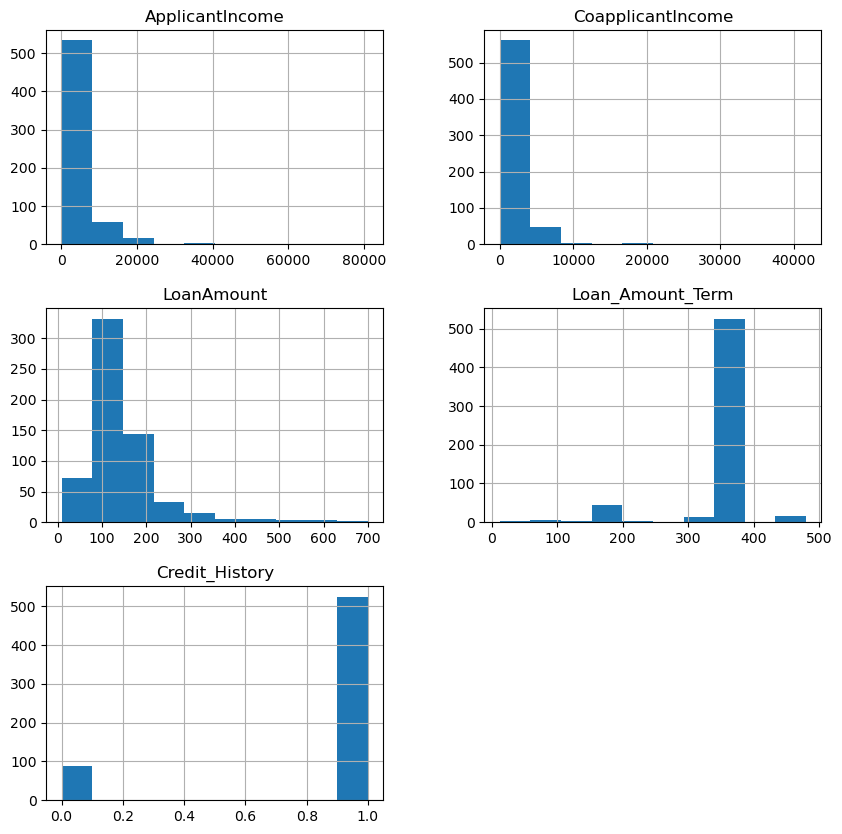

In [24]:
df.hist(figsize=(10,10))

# Bi-variate Analysis

In [25]:
# Creating a function
def relation_target(df,col):
    plt.figure(figsize=(15,6))
    plt.title(col+' Vs Loan_Status ',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
    sns.countplot(x =col, hue ="Loan_Status",palette='colorblind' ,data = df)
    plt.show()

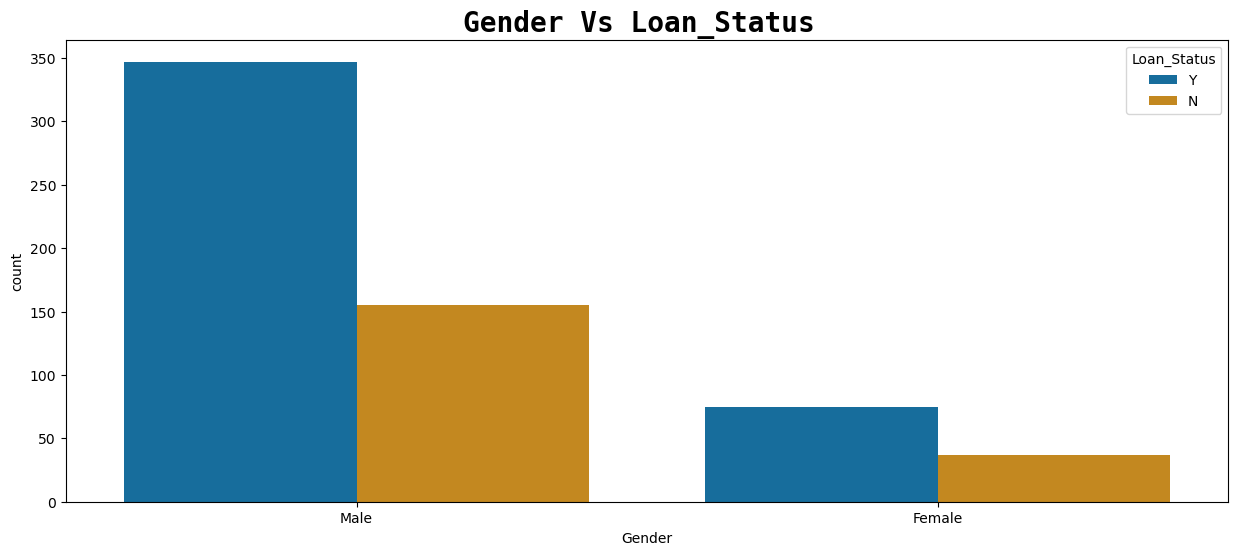

In [26]:
relation_target(df,'Gender')

We could see that Mostly Males sanctioned for loan as compaired to Females.

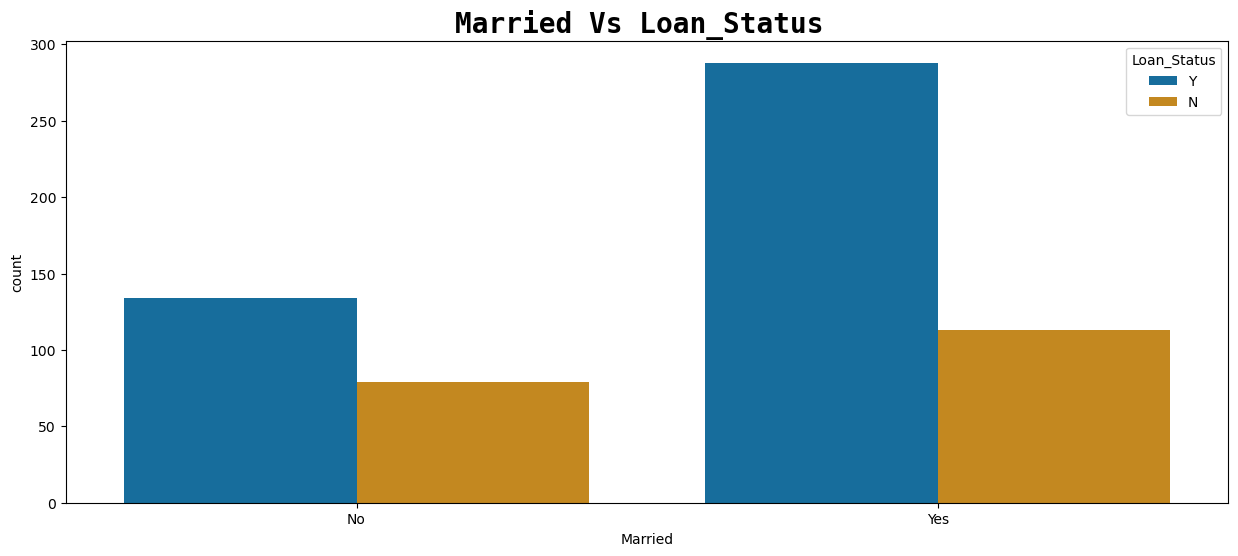

In [27]:
relation_target(df,'Married')

Around 300 applicants are married whose loans are approved as compared to the applicants who are not married but their loans were approved

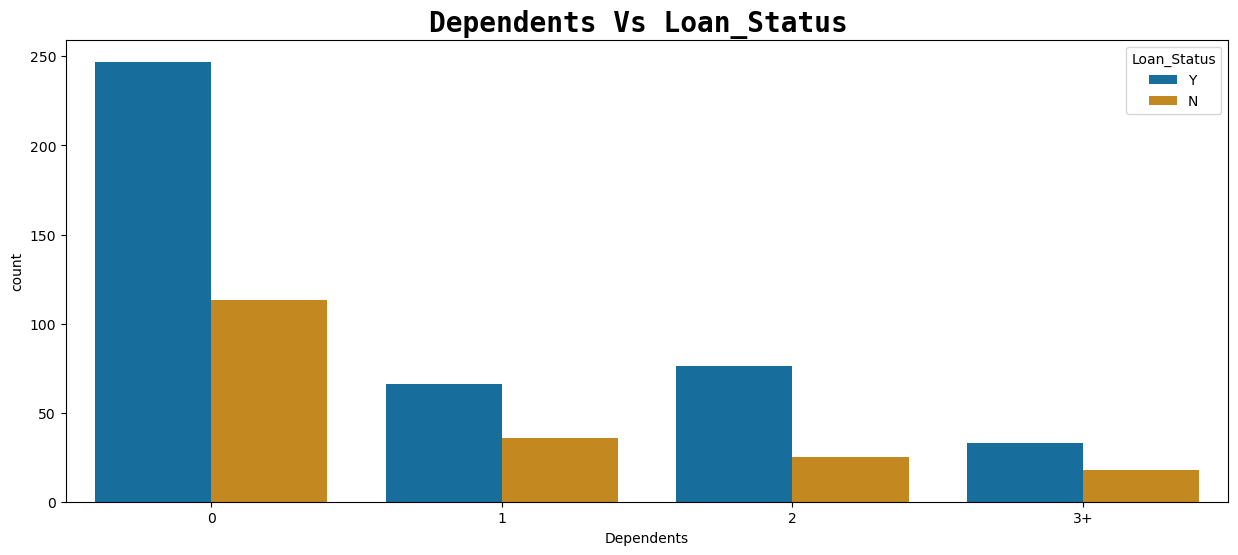

In [28]:
relation_target(df,'Dependents')

Majority of the applicants whose loans are approved have no or 0 dependency & the minimun loan approved to those who has higher number of dependents.

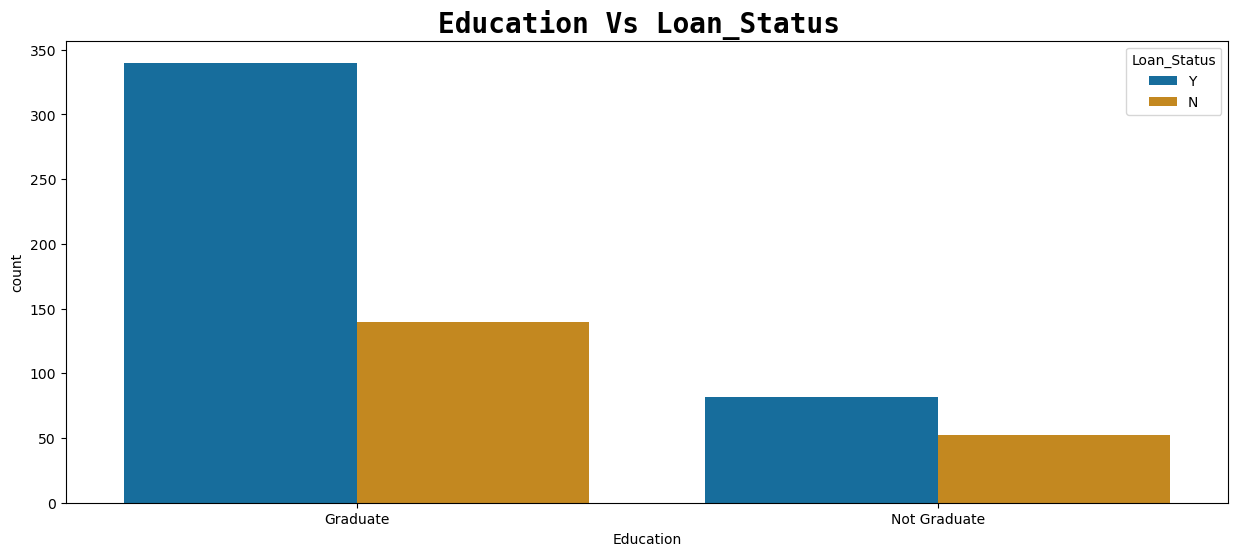

In [29]:
relation_target(df,'Education')

The count of graduates whose loans are approved is high as compared to the non graduates having approved loans

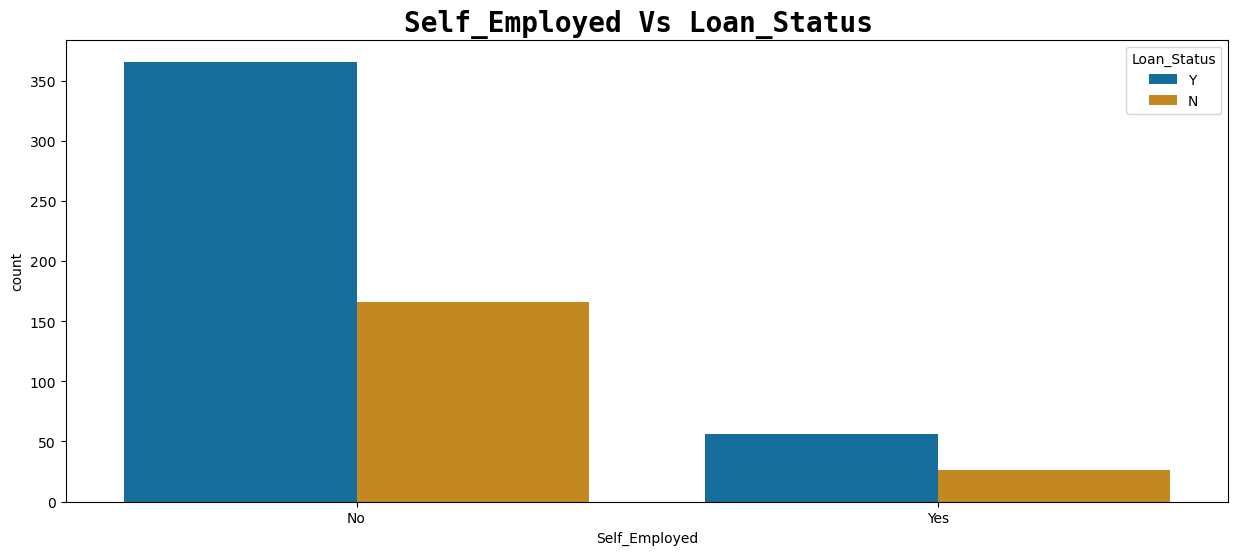

In [30]:
relation_target(df,'Self_Employed')

The percentage of self-employed applicants having approved loans is around 15% of the non self employed applicants having approved loans.

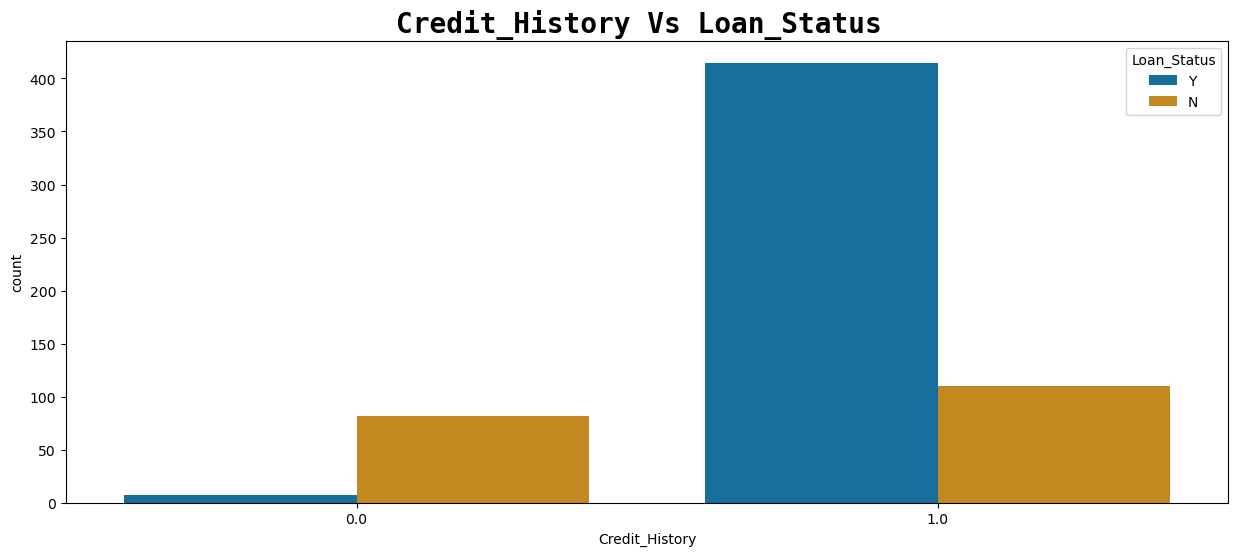

In [31]:
relation_target(df,'Credit_History')

People who has credit history 1 has the highest loan approval as compared to 0 credit history. People Who has zero credit score mostly they are denied to grant loan.

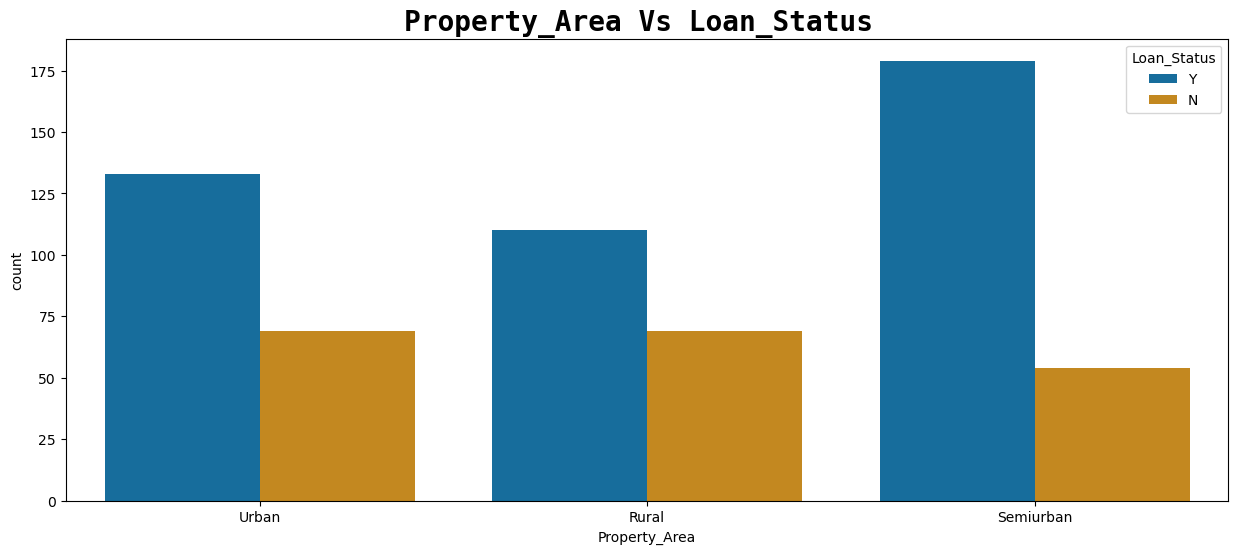

In [32]:
relation_target(df,'Property_Area')

The max. no. of applicants whose loans are approved belongs to or having property in semi-urban area.

In [33]:
def barplot_target(df,col):
    plt.figure(figsize=(15,6))
    plt.title(col+' Vs Loan_Status ',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
    sns.barplot(y =col, x="Loan_Status",palette='colorblind' ,data = df)
    plt.show() 

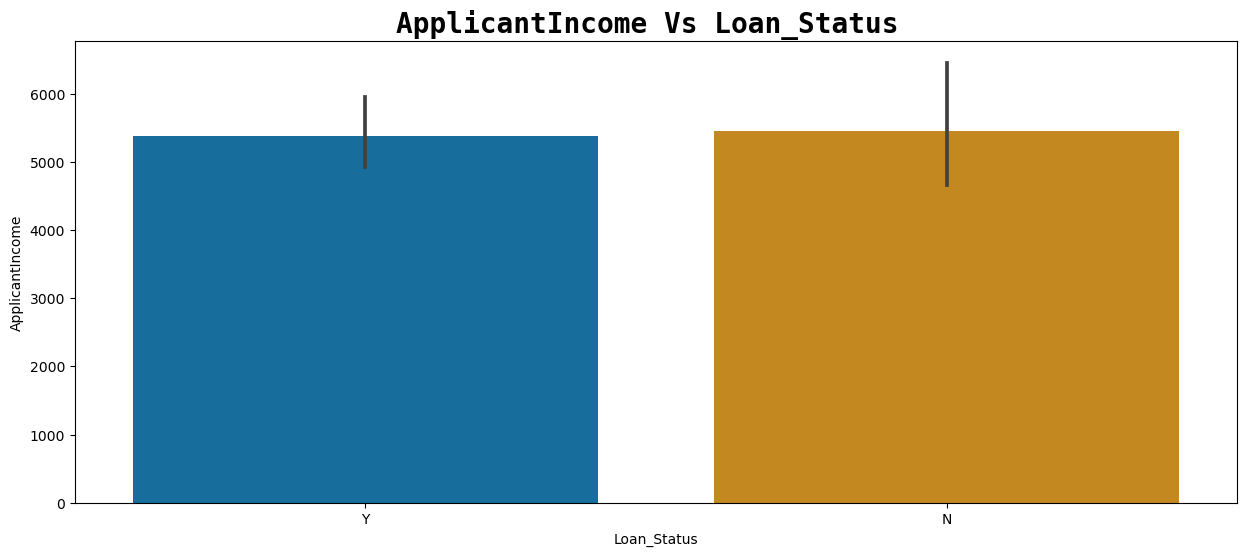

In [34]:
barplot_target(df,'ApplicantIncome')

There is almost similar income of people who sanction loans/ denied. Applicant income has no significance to decide whether loan will approve or not.

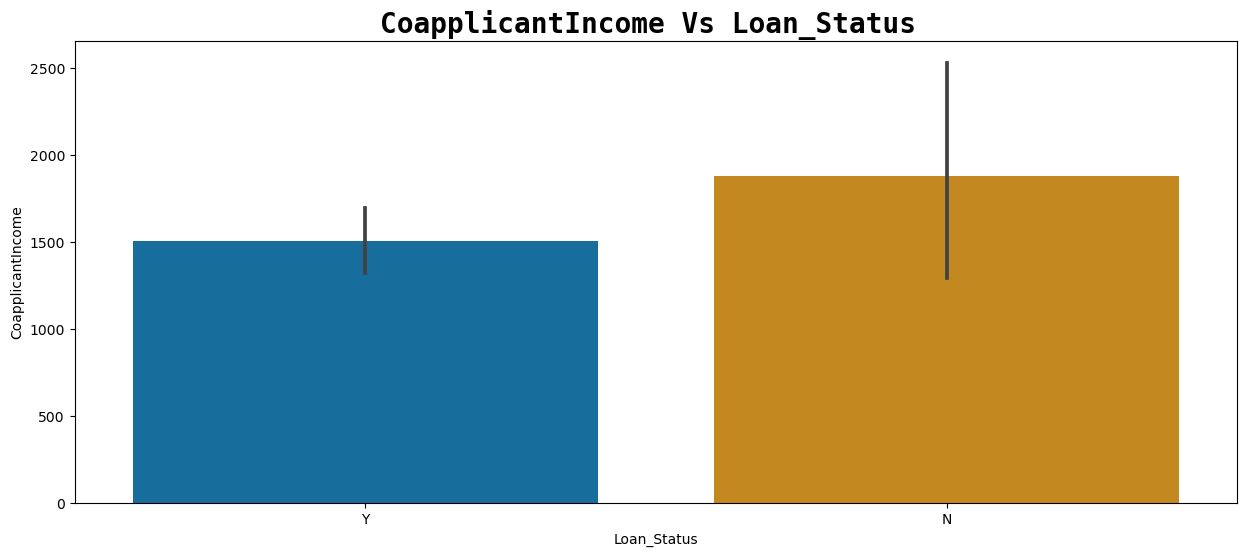

In [35]:
barplot_target(df,'CoapplicantIncome')

We can observe that, if co applicant income is higher than 1500, there are chances of denial to loan.

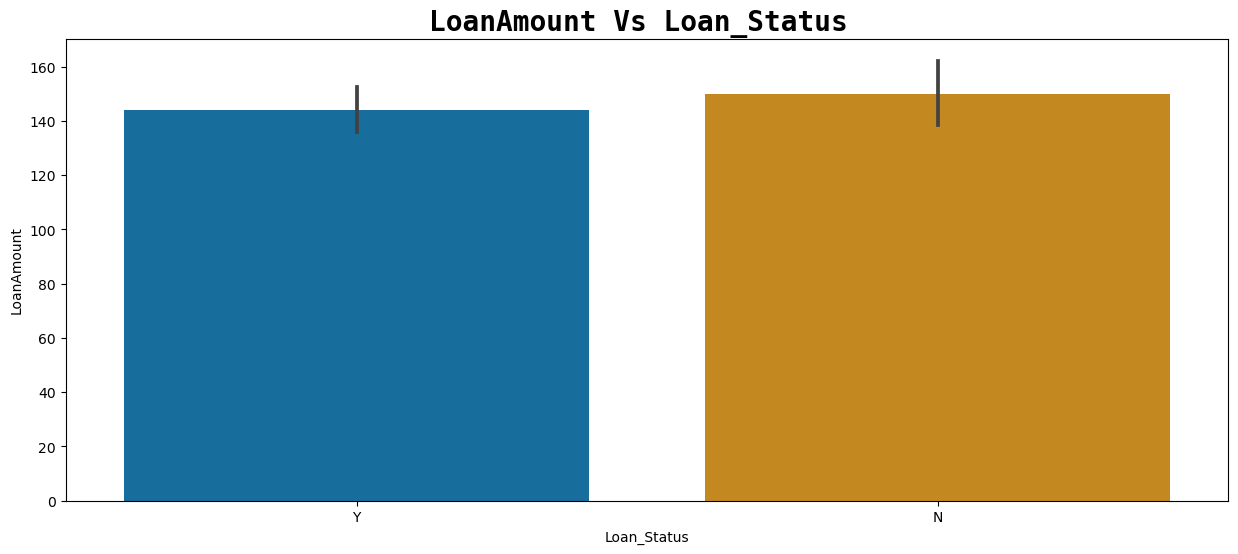

In [36]:
barplot_target(df,'LoanAmount')

There is almost similar trend regarding Loan Amount. There is no relation between Loan Amount and Loan Status.

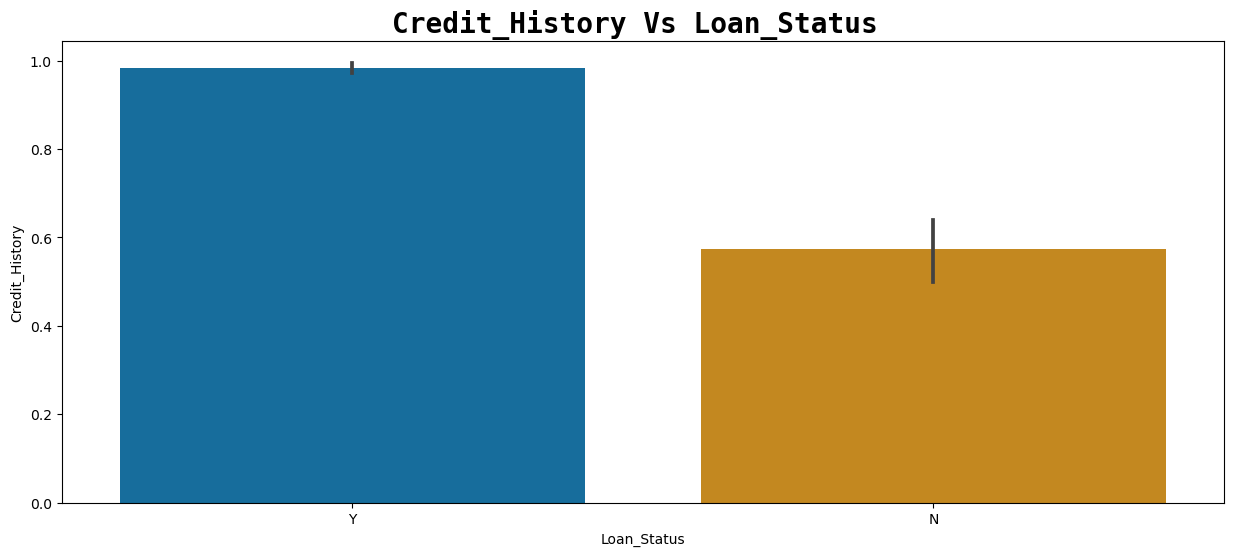

In [37]:
barplot_target(df,'Credit_History')

As earlier we can see that a person who has credit history one has highest loan approval rate

# Relation With Applicant Income and Other Attributes

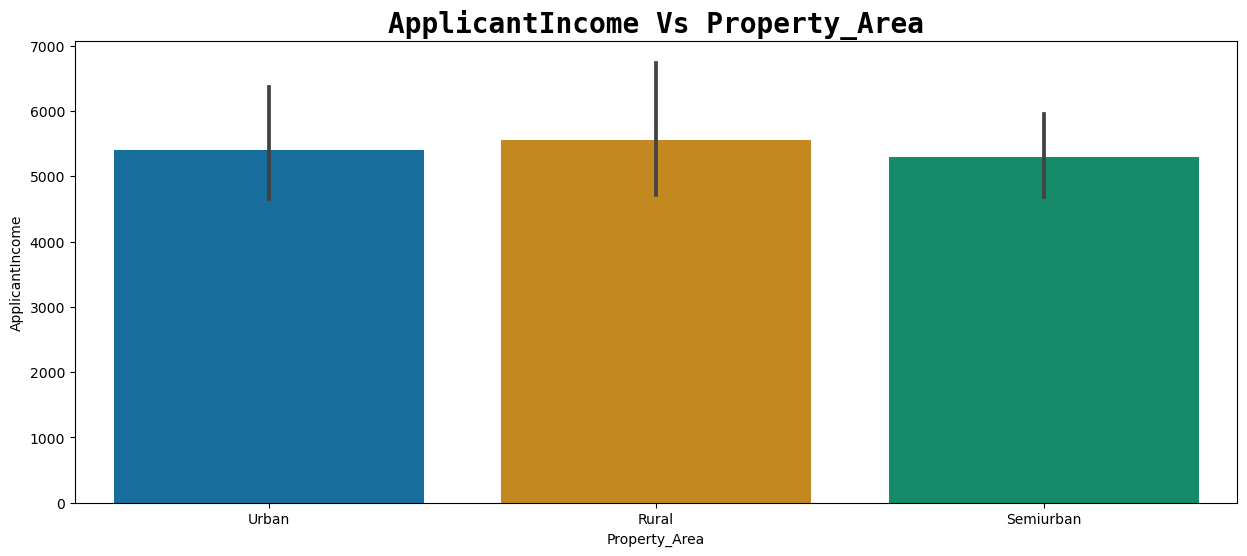

In [38]:
plt.figure(figsize=(15,6))
plt.title('ApplicantIncome Vs Property_Area',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Property_Area",palette='colorblind' ,data = df)
plt.show()

There is almost similar income status of applicants belong from different regions.

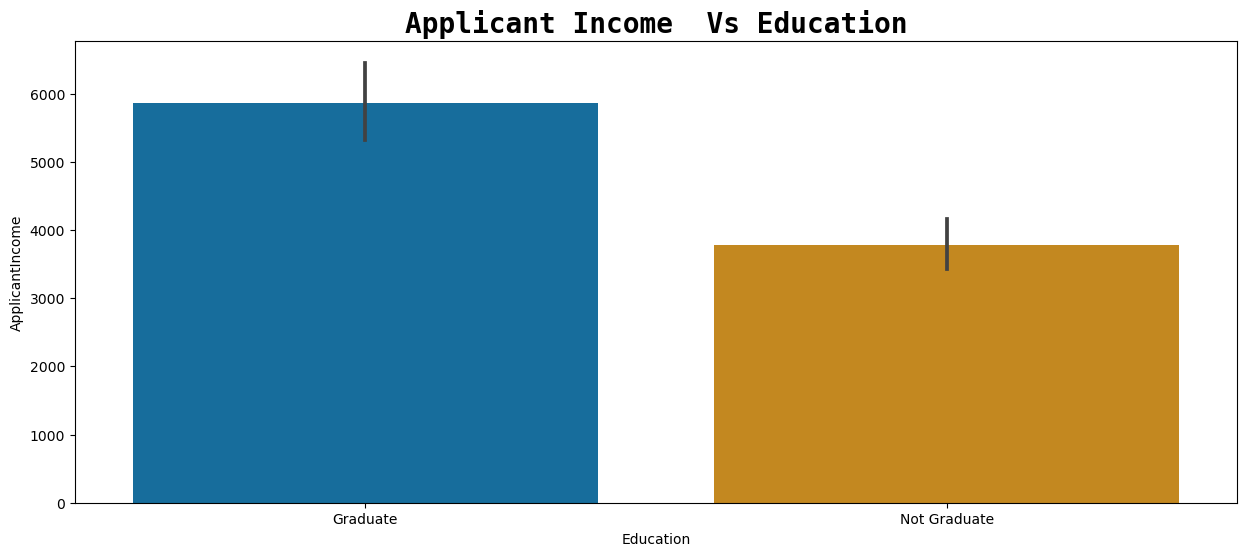

In [39]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Education',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Education",palette='colorblind' ,data = df)
plt.show()

Graduate Applicant's income is higher than non Graduate Applicants.

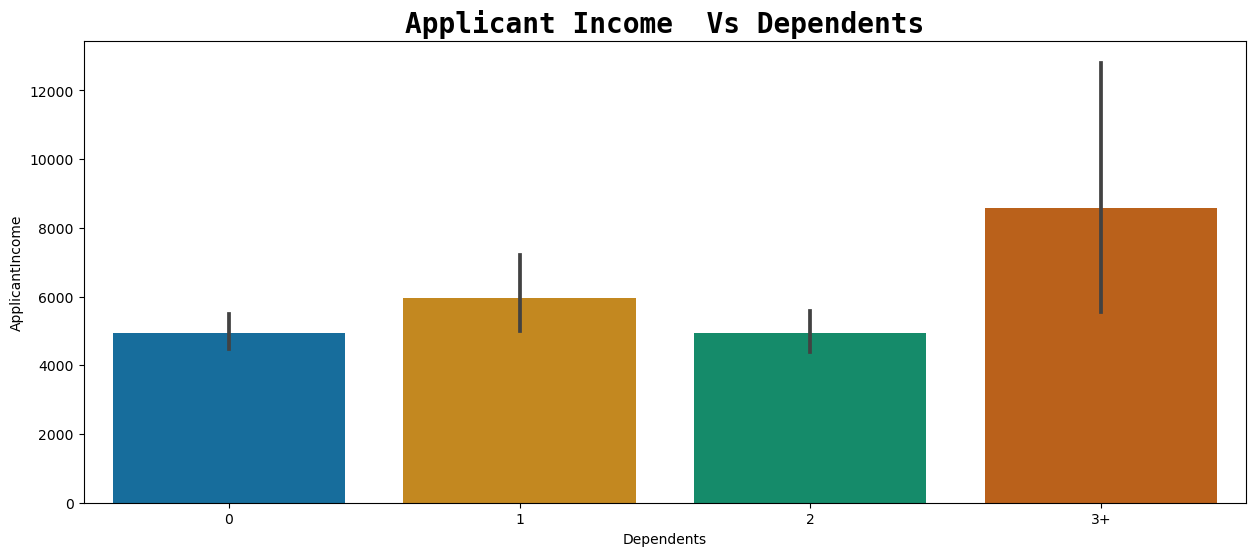

In [40]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Dependents',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Dependents",palette='colorblind' ,data = df)
plt.show()

The Applicant who has maximum number of depenents has higher income (8000+).

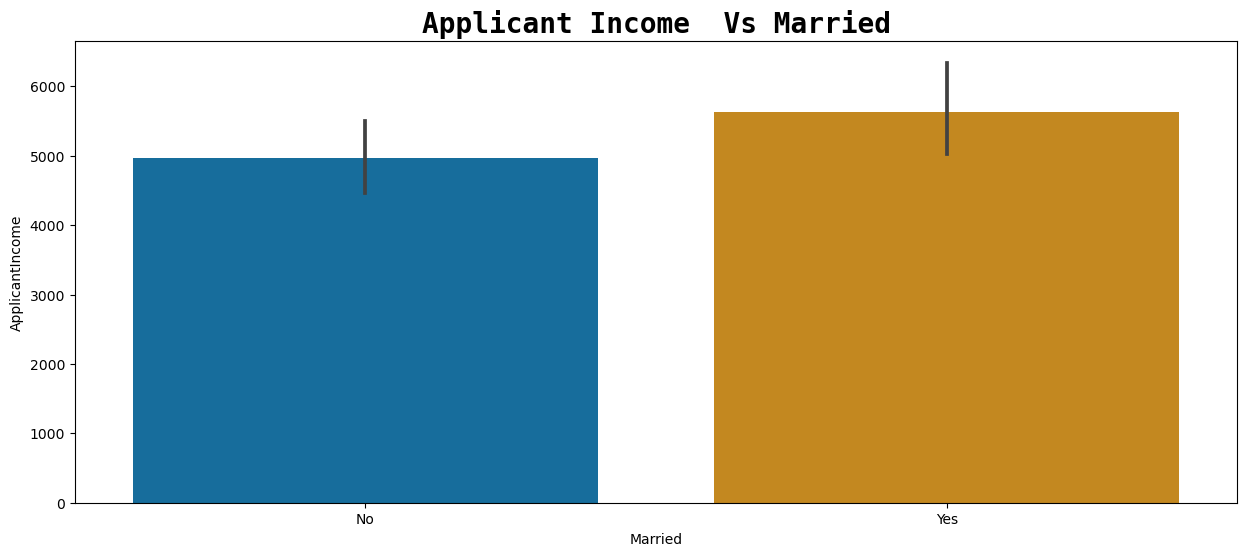

In [41]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Married',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Married",palette='colorblind' ,data = df)
plt.show()

The Applicant who are married has higher income as compared to unmarried applicants.

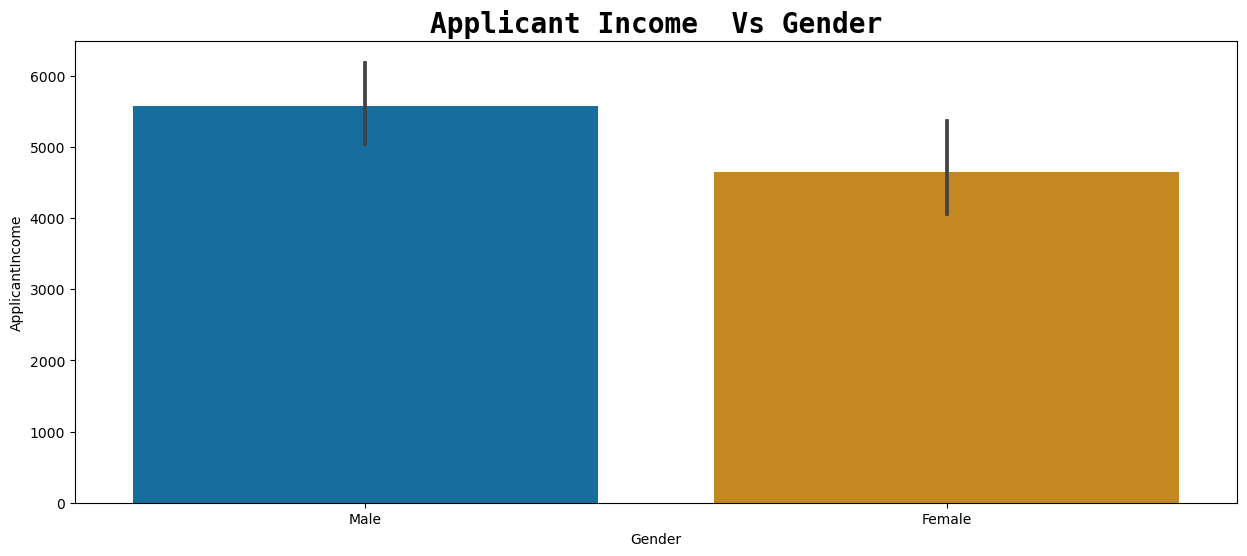

In [42]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Gender',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Gender",palette='colorblind' ,data = df)
plt.show()

Male applicant's income is higher than the female applicants.

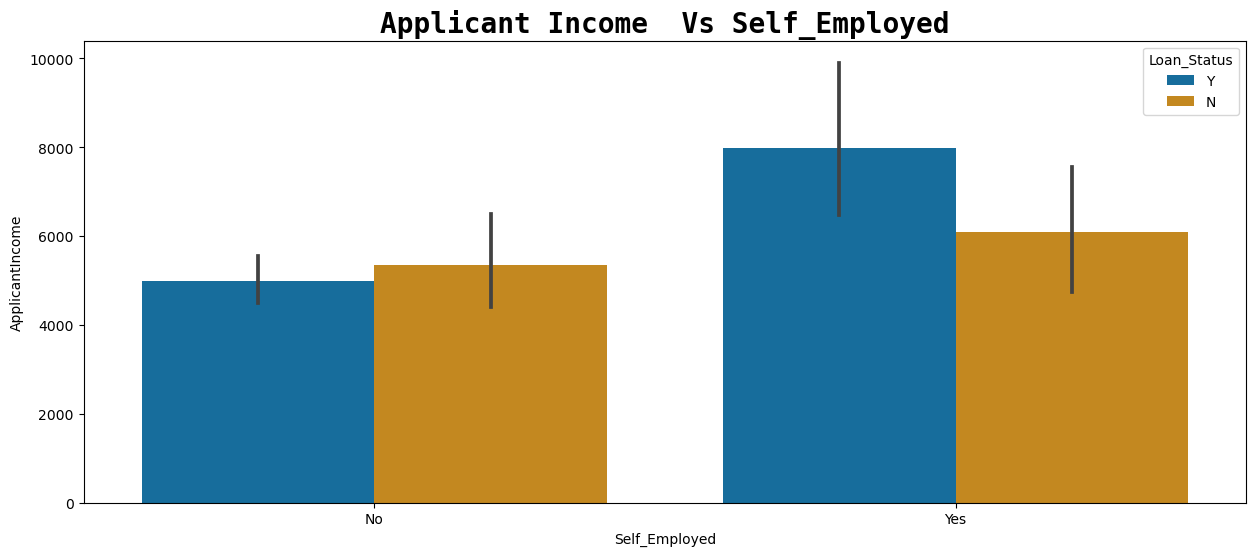

In [43]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Self_Employed',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Self_Employed",hue='Loan_Status',palette='colorblind' ,data = df)
plt.show()

We could see that the person who are self employed are earning well and their loan approval rate is also high as compared to non-self employed.

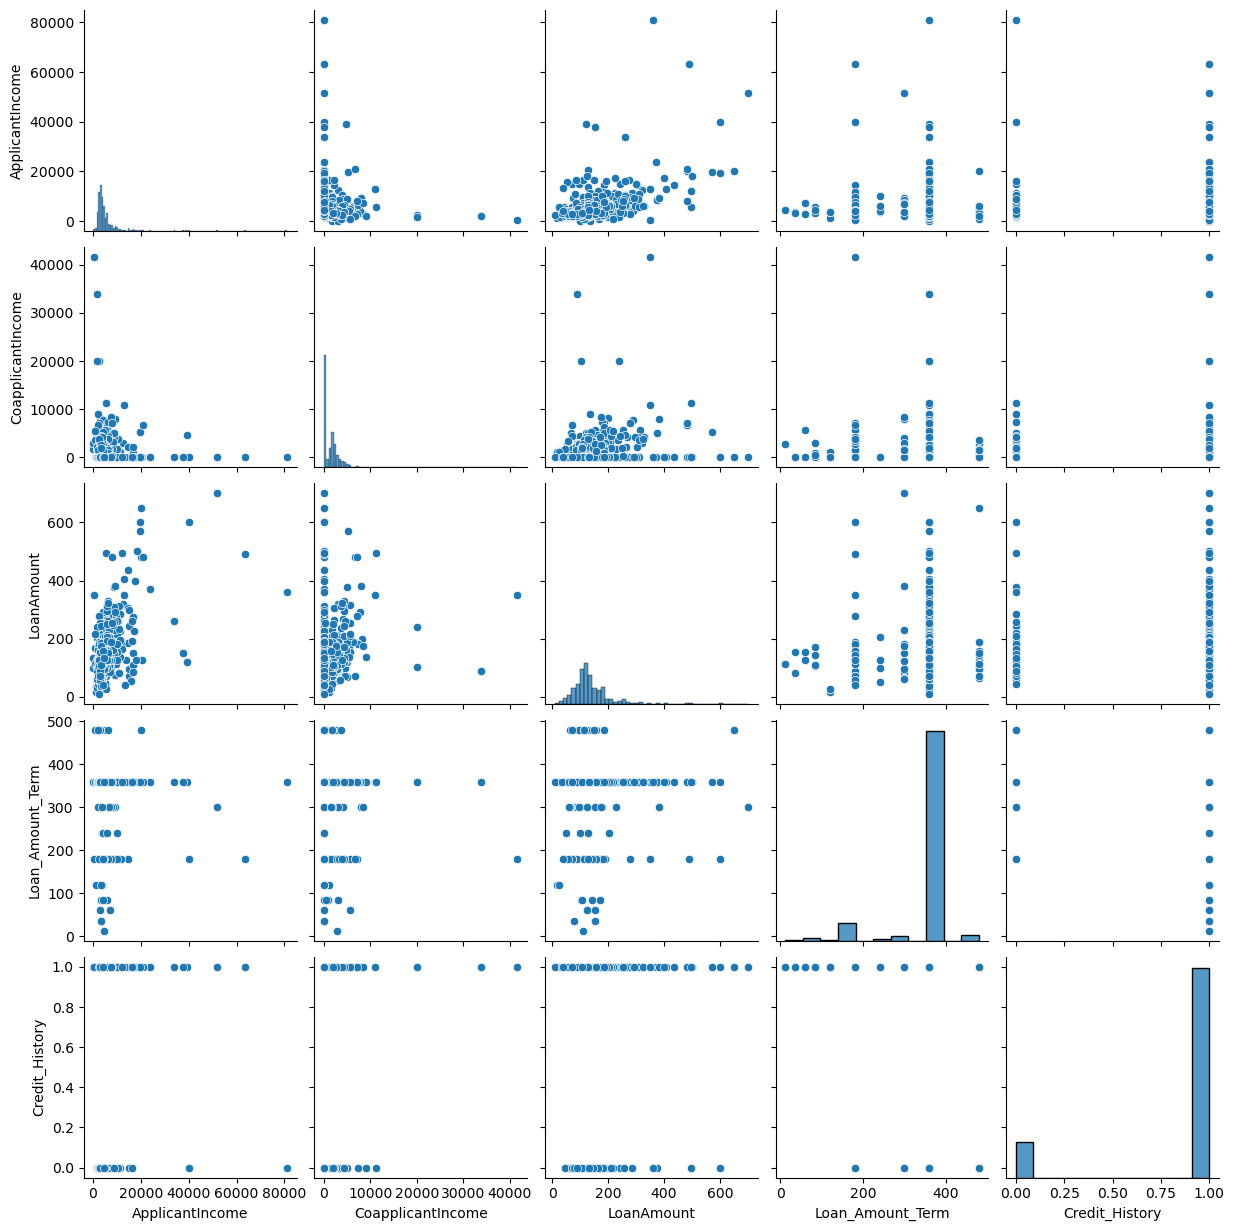

In [44]:
# Plotting a pair plot
sns.pairplot(df)

# Distribution

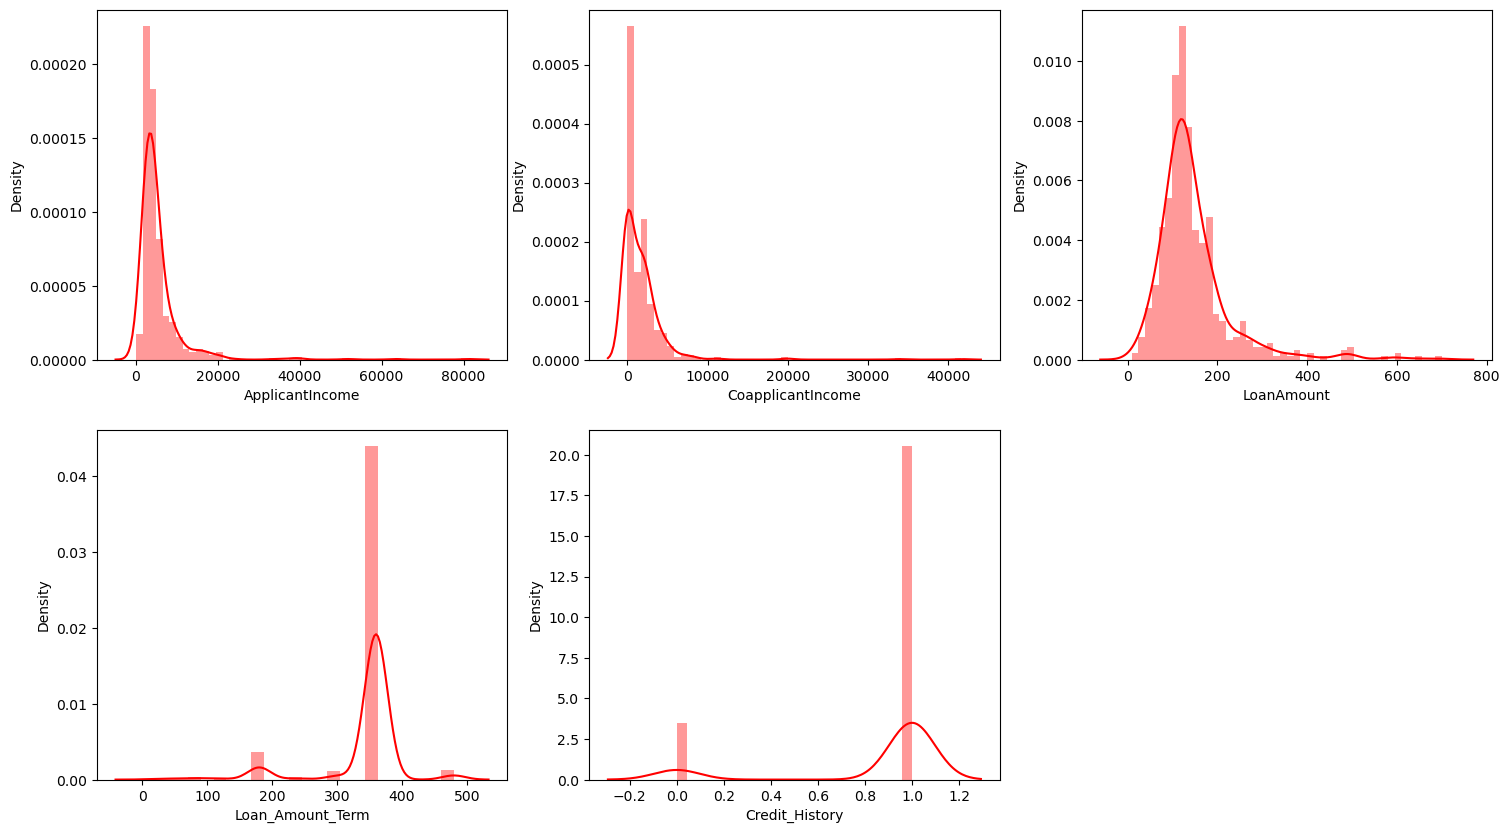

In [45]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.distplot(df[col],color='red')
        plt.xlabel(col)
        plot=plot+1
plt.show()

:       We can see that applicants income, Co-applicants income, Loan Amount are right skewed.

:       Loan Amount Term has majority values of 360 months.

:       Credit history has only two values (0 or 1 ). In which majority values are One.

# Outliers Detection

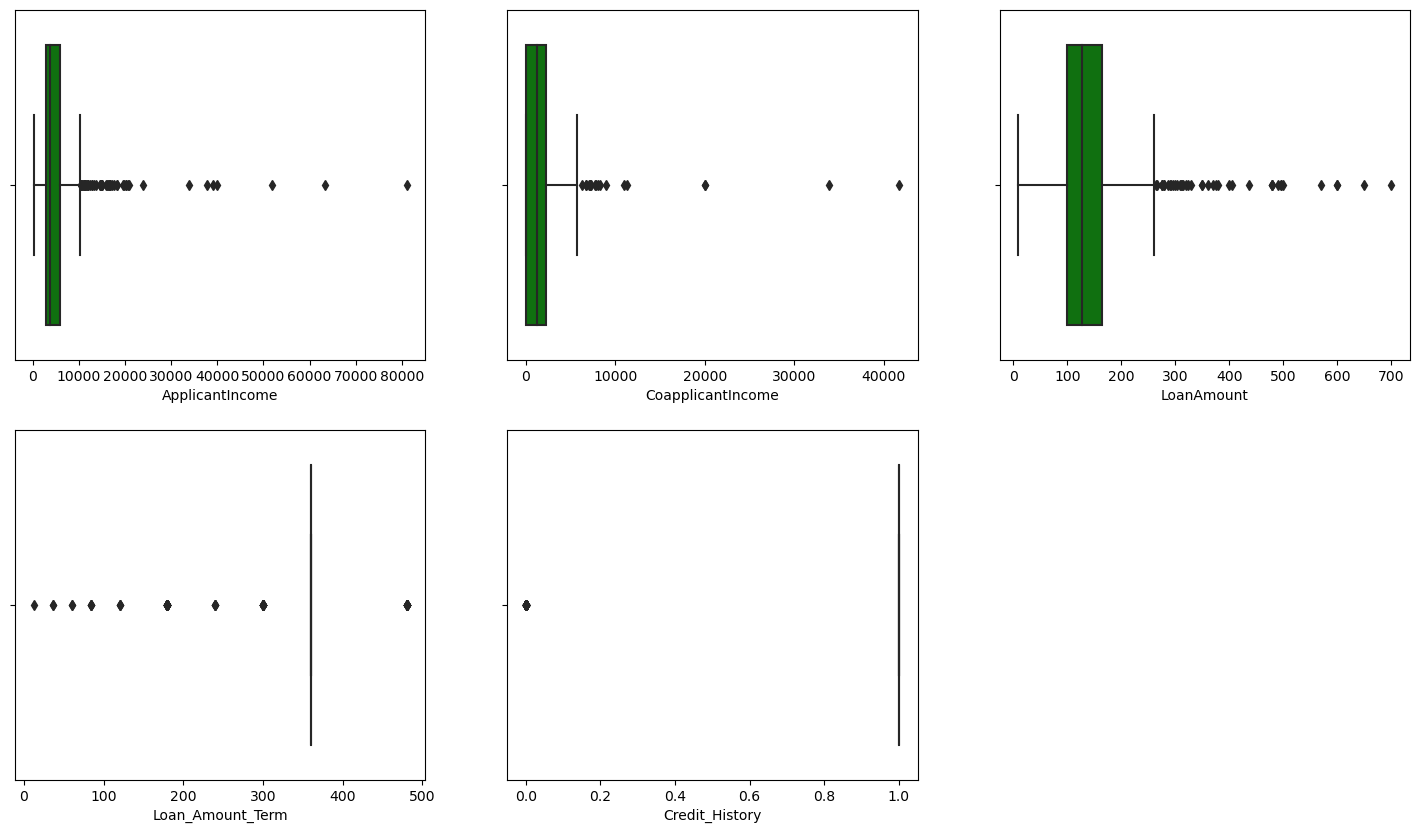

In [46]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.boxplot(df[col],color='green')
        plt.xlabel(col)
        plot=plot+1
plt.show()

Outliers are present in Appilcants Income, Coapplicants Income and Loan Amounts.

# Outliers Treatment

In [47]:
## when data is normally distributed.
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

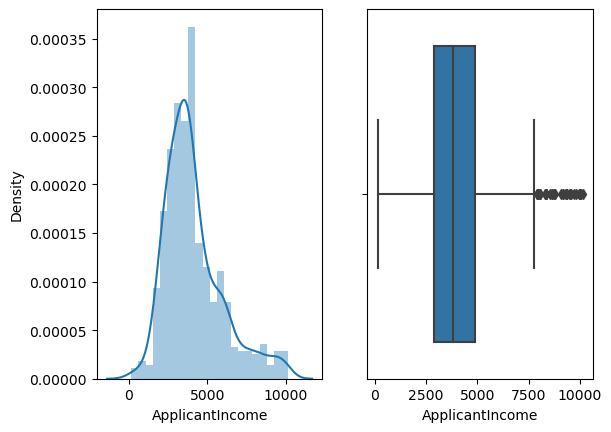

In [48]:
replace_outlier(df,'ApplicantIncome')

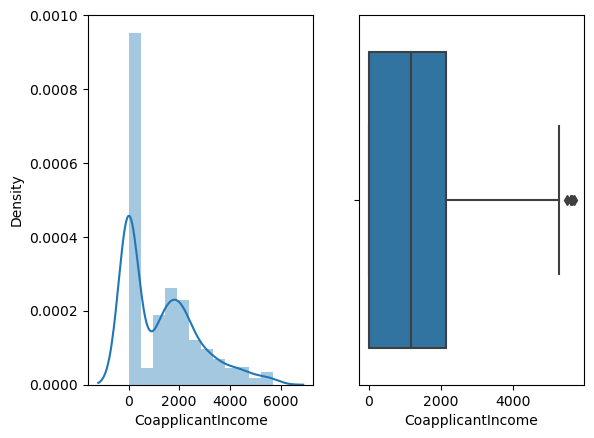

In [49]:
replace_outlier(df,'CoapplicantIncome')

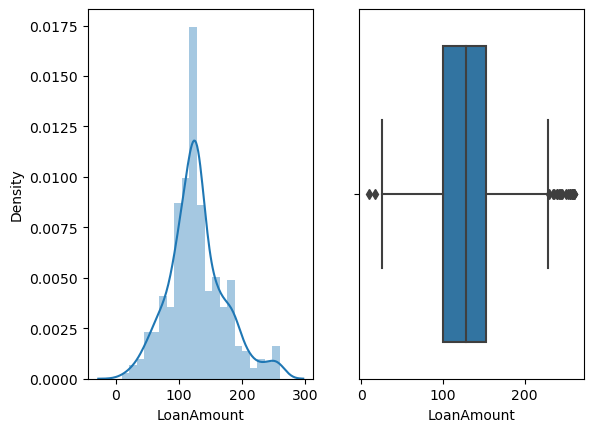

In [50]:
replace_outlier(df,'LoanAmount')

We have sucesfully replace our outliers from Applicant income,Co applicant Income & Loan Amount.

# Skewness

In [51]:
df_1=df.copy()

In [52]:
df_1.skew()

ApplicantIncome      1.149106
CoapplicantIncome    0.936471
LoanAmount           0.498333
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [53]:
df_1['ApplicantIncome']=np.sqrt(df_1['ApplicantIncome'])

In [54]:
df_1['CoapplicantIncome']=np.sqrt(df_1['CoapplicantIncome'])

In [55]:
df_1['LoanAmount']=np.sqrt(df_1['LoanAmount'])

In [56]:
df_1.skew()

ApplicantIncome      0.438048
CoapplicantIncome    0.152060
LoanAmount          -0.242054
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

We have removed skewness to its possible extent.

# Label Encoding

In [57]:
# converting categorical column into numeric using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in obj_df:
    df_1[col]=le.fit_transform(df_1[col])

In [58]:
df_1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,76.478755,0.000000,11.313708,360.0,1.0,2,1
1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1


# Splitting Data into Input and Output Variable

In [59]:
x = df_1.drop(['Loan_Status'],axis=1)
y = df_1['Loan_Status']

In [60]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,76.478755,0.000000,11.313708,360.0,1.0,2
1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2
3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2
4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,53.851648,0.000000,8.426150,360.0,1.0,0
610,1,1,3,0,0,64.078077,0.000000,6.324555,180.0,1.0,0
611,1,1,1,0,0,89.844310,15.491933,15.905974,360.0,1.0,2
612,1,1,2,0,0,87.080423,0.000000,13.674794,360.0,1.0,2


In [61]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

# Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.005715,-1.043770,0.080351,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.374031,0.521418,0.080351,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.555816,-1.043770,-1.492806,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.839903,0.913442,-0.096836,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.076280,-1.043770,0.356858,0.273231,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.622043,-1.043770,-1.343803,0.273231,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,0.113630,-1.043770,-2.380318,-2.522836,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.967212,-0.419358,2.345274,0.273231,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,1.768382,-1.043770,1.244848,0.273231,0.411733,1.223298


Standardization doesn’t have any fixed minimum or maximum value. Here, the values of all the columns are scaled in such a way that they all have a mean equal to 0 and standard deviation equal to 1. This scaling technique works well with outliers. Thus, this technique is preferred if outliers are present in the dataset.

# Feature Importance

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [64]:
print(extra.feature_importances_)

[0.02175153 0.02165716 0.06150448 0.0219651  0.02429767 0.19428415
 0.09901732 0.17335265 0.04934765 0.27963579 0.05318649]


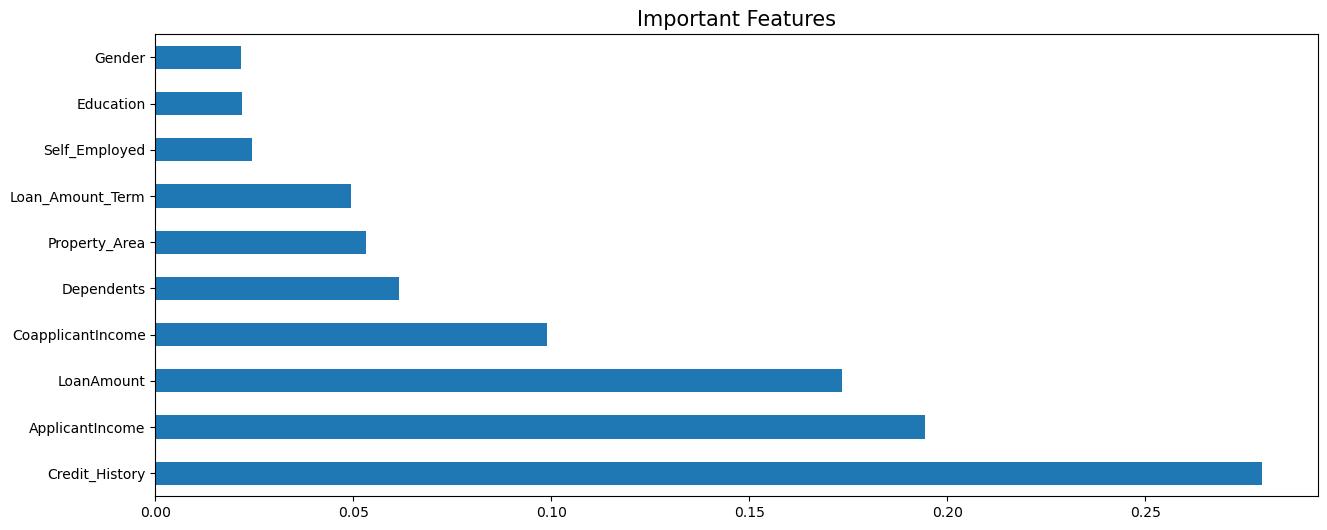

In [65]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

# Model Building

# Importing Packages For Classification Algoritham

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [67]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0,stratify=y)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std())
    print('\n')
    print('F1 score',f1_score(y_test,pred))
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
 
    print("\n\n")
    return final_r

In [68]:
## Logistic Regression
lg=LogisticRegression()
max_accuracy_score(lg,x,y)

max accuracy score corresponding to 42 is 0.8130081300813008


cross validation score 0.8078235372517659


Standard Deviation 0.026964969382167303


F1 score 0.8795811518324608


Training accuracy 0.8085539714867617


Test Accuracy 0.8130081300813008


Confusion Matrix [[16 22]
 [ 1 84]]


Classification Report               precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123








42

In [69]:
## DEcision Tree
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

max accuracy score corresponding to 64 is 0.7479674796747967


cross validation score 0.7035585765693722


Standard Deviation 0.037476777866917305


F1 score 0.8047337278106509


Training accuracy 1.0


Test Accuracy 0.7317073170731707


Confusion Matrix [[22 16]
 [17 68]]


Classification Report               precision    recall  f1-score   support

           0       0.56      0.58      0.57        38
           1       0.81      0.80      0.80        85

    accuracy                           0.73       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.73      0.73      0.73       123








64

In [70]:
## KNn
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

max accuracy score corresponding to 42 is 0.8048780487804879


cross validation score 0.7752099160335866


Standard Deviation 0.0186916570069692


F1 score 0.8709677419354839


Training accuracy 0.8065173116089613


Test Accuracy 0.8048780487804879


Confusion Matrix [[18 20]
 [ 4 81]]


Classification Report               precision    recall  f1-score   support

           0       0.82      0.47      0.60        38
           1       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123








42

In [71]:
##Naive Bayes
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

max accuracy score corresponding to 42 is 0.8130081300813008


cross validation score 0.8045848327335733


Standard Deviation 0.029382051515228578


F1 score 0.8795811518324608


Training accuracy 0.8085539714867617


Test Accuracy 0.8130081300813008


Confusion Matrix [[16 22]
 [ 1 84]]


Classification Report               precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123








42

In [72]:
#Random forest
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

max accuracy score corresponding to 94 is 0.8292682926829268


cross validation score 0.7801412768226044


Standard Deviation 0.022582859207335392


F1 score 0.8709677419354839


Training accuracy 1.0


Test Accuracy 0.8048780487804879


Confusion Matrix [[18 20]
 [ 4 81]]


Classification Report               precision    recall  f1-score   support

           0       0.82      0.47      0.60        38
           1       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123








94

In [73]:
## adaboost
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

max accuracy score corresponding to 42 is 0.8048780487804879


cross validation score 0.7768892443022791


Standard Deviation 0.010687030066237899


F1 score 0.8695652173913043


Training accuracy 0.8370672097759674


Test Accuracy 0.8048780487804879


Confusion Matrix [[19 19]
 [ 5 80]]


Classification Report               precision    recall  f1-score   support

           0       0.79      0.50      0.61        38
           1       0.81      0.94      0.87        85

    accuracy                           0.80       123
   macro avg       0.80      0.72      0.74       123
weighted avg       0.80      0.80      0.79       123








42

In [74]:
## Gardient Boost
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

max accuracy score corresponding to 42 is 0.7967479674796748


cross validation score 0.7785419165667067


Standard Deviation 0.0245447526171547


F1 score 0.8618784530386742


Training accuracy 0.8859470468431772


Test Accuracy 0.7967479674796748


Confusion Matrix [[20 18]
 [ 7 78]]


Classification Report               precision    recall  f1-score   support

           0       0.74      0.53      0.62        38
           1       0.81      0.92      0.86        85

    accuracy                           0.80       123
   macro avg       0.78      0.72      0.74       123
weighted avg       0.79      0.80      0.79       123








42

In [77]:
best_model=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','KNN','GaussianNB','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier'],
                         'Accuracy Score':[81,75,80,81,82,80,79,]})
best_model               

,Model,Accuracy Score
0,LogisticRegression,81
1,DecisionTreeClassifier,75
2,KNN,80
3,GaussianNB,81
4,RandomForestClassifier,82
5,AdaBoostClassifier,80
6,GradientBoostingClassifier,79


# Conclusion:

Based on the above data frame and accuracy check for all the model, we conclude that Random Forest is Most generalised model among all because it gives us highest accuracy . So this would be our best model to predict the loan approval status.